# ARIMA Forecasting Simple
Following the tutorial ["Time Series Analysis and Forecasting with ARIMA in Python"](https://medium.com/datainc/time-series-analysis-and-forecasting-with-arima-in-python-aa22694b3aaa)

Info on the P, D, Q values for ARIMA ["Finding Optimal P,D,Q"](https://blog.devgenius.io/finding-optimal-p-d-and-q-values-for-your-arima-model-94669a909a35)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

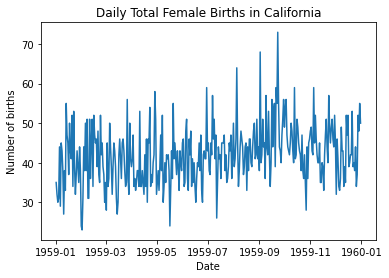

In [15]:
# Load the dataset
data = pd.read_csv('daily-total-female-births.csv')

# rename columns
data.columns = ['date', 'births']

# Convert the date column to a datestamp type
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Plot the time series
plt.plot(data['births'])
plt.title('Daily Total Female Births in California')
plt.xlabel('Date')
plt.ylabel('Number of births')
plt.show()

## Check for Stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['births'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.808291
p-value: 0.000052


p-value is below 0.05 so data meets the stationarity requirement, no trend up or down.

## Check for Lag values (p and q)

c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


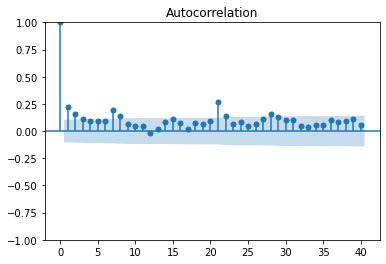

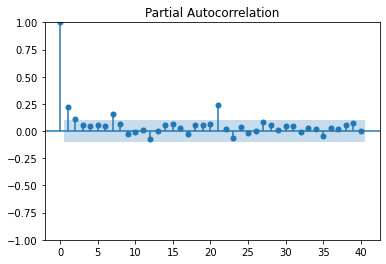

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['births'], lags=40)
plot_pacf(data['births'], lags=40)
plt.show()

Use the Autocorrelation and Partial Autocorrelation plots to find p and q for the ARIMA (p, d, q) values.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['births'], order=(1, 0, 1))
model_fit = model.fit()

# adjust the steps for the number of days to forecast
forecast = model_fit.get_forecast(steps=30)

test_forecast_series = pd.Series(forecast.predicted_mean)

c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
# view the forecast
print("Min Training Date:", data.index.min())
print("Min Forecast Date:", test_forecast_series.index.min())
print("Max Forecast Date:", test_forecast_series.index.max())
print('Number of Forecast Observations:', len(test_forecast_series))

print(test_forecast_series.tail(10))

Min Training Date: 1959-01-01 00:00:00
Min Forecast Date: 1960-01-01 00:00:00
Max Forecast Date: 1960-01-30 00:00:00
Number of Forecast Observations: 30
1960-01-21    43.045795
1960-01-22    43.021433
1960-01-23    42.997559
1960-01-24    42.974163
1960-01-25    42.951236
1960-01-26    42.928767
1960-01-27    42.906749
1960-01-28    42.885171
1960-01-29    42.864025
1960-01-30    42.843302
Freq: D, Name: predicted_mean, dtype: float64


## Test the Model Performance

c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


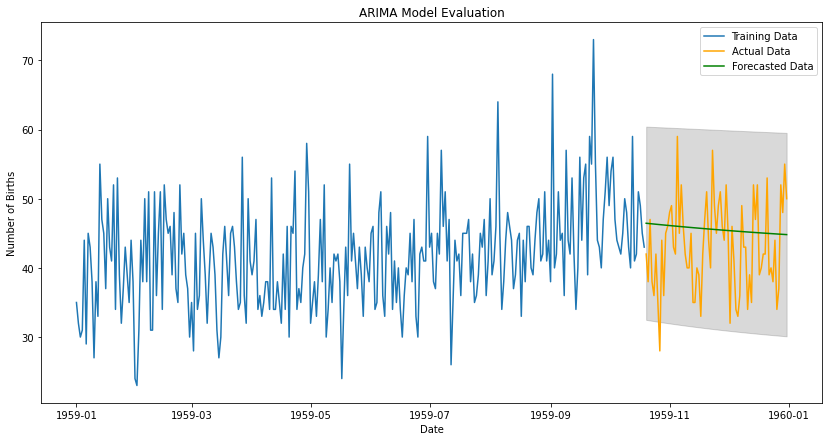

RMSE: 6.970853395332547


In [20]:
# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['births'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['births'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['births'], label='Training Data')
plt.plot(test['births'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)